In [1]:
from Bio.Align.Applications import ClustalwCommandline
from Bio import Phylo
import os
import bioinfo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
in_file = "./data/TRIM5ALPHA_complete_PopSet"
cline = ClustalwCommandline("clustalw2", infile = in_file)

In [3]:
cline()

('\n\n\n CLUSTAL 2.1 Multiple Sequence Alignments\n\n\nSequence format is Pearson\nSequence 1: AY843504.1  2148 bp\nSequence 2: AY843505.1  2094 bp\nSequence 3: AY843506.1  2082 bp\nSequence 4: AY843507.1  2088 bp\nSequence 5: AY843508.1  2088 bp\nSequence 6: AY843509.1  2085 bp\nSequence 7: AY843510.1  2082 bp\nSequence 8: AY843511.1  2256 bp\nSequence 9: AY843512.1  2085 bp\nSequence 10: AY843513.1  2082 bp\nSequence 11: AY843514.1  2088 bp\nSequence 12: AY843515.1  2085 bp\nSequence 13: AY843516.1  2244 bp\nSequence 14: AY843517.1  2085 bp\nSequence 15: AY843518.1  2085 bp\nSequence 16: AY843519.1  2085 bp\nSequence 17: AY843520.1  2244 bp\nStart of Pairwise alignments\nAligning...\n\nSequences (1:2) Aligned. Score:  98\nSequences (1:3) Aligned. Score:  95\nSequences (1:4) Aligned. Score:  98\nSequences (1:5) Aligned. Score:  97\nSequences (1:6) Aligned. Score:  94\nSequences (1:7) Aligned. Score:  95\nSequences (1:8) Aligned. Score:  85\nSequences (1:9) Aligned. Score:  88\nSequenc

### Processo de alinhamento de sequências

In [4]:
from Bio import AlignIO

In [5]:
align = AlignIO.read("./data/TRIM5ALPHA_complete_PopSet.aln","clustal")

In [6]:
print(align)

SingleLetterAlphabet() alignment with 17 rows and 2358 columns
ATGGCTTCTGGAATCCTGGTTAATGTAAAGGAGGAGGTGACCTG...TGA AY843506.1
ATGGCTTCTGGAATCCTGGTTAATGTAAAGGAGGAGGTGACCTG...TGA AY843510.1
ATGGCTTCTGGAATCCTGGTTAATGTAAAGGAGAAGGTGACCTG...TGA AY843509.1
ATGGCTTCTGGAATCCTGGTTAATGTAAAGGAGGAGGTGACCTG...TGA AY843513.1
ATGGCTTCTGGAATCCTGCTTAATGTAAAGGAGGAGGTGACCTG...TGA AY843504.1
ATGGCTTCTGGAATCCTGCTTAATGTAAAGGAGGAGGTGACCTG...TGA AY843505.1
ATGGCTTCTGGAATCCTGCTTAATGTAAAGGAGGAGGTGACCTG...TGA AY843514.1
ATGGCTTCTGGAATCCTGGTTAATATAAAGGAGGAGGTGACCTG...TGA AY843507.1
ATGGCTTCTGGAATCCTGGTTAATATAAAGGAGGAGGTGACCTG...TGA AY843508.1
ATGGCTTCCGAAATCCTGTTGAATATAAAGGAGGAGGTGACCTG...TGA AY843516.1
ATGGCTTCCGAAATCCTGGTGAATATAAAGGAGGAGGTGACCTG...TGA AY843520.1
ATGGCTTCCAAAATCCTGGTGAATATAAAGGAGGAGGTGACCTG...TGA AY843511.1
ATGGCTTCCAGAATCCTGGTGAATATAAAGGAGGAGGTAACCTG...TGA AY843512.1
ATGGCTTCCAGAATCCTGGTGAATATAAAGGAGGAGGTGACCTG...TGA AY843518.1
ATGGCTTCCAGAATCCTGATGAACATAAAGGAGGAGGTGACCTG...TGA AY843515.1
ATGGCTT

### Árvore Filogenética

In [7]:
with open('trim5alpha_species_names.dnd', 'w'): pass
f = open("trim5alpha_species_names.dnd","w+")
f.write(bioinfo.tree_node_names("./data/TRIM5ALPHA_complete_PopSet.dnd",bioinfo.gen_df('./data/TRIM5ALPHA_complete_PopSet')))
f.close()

In [8]:
tree = Phylo.read("trim5alpha_species_names.dnd", "newick")

In [9]:
print(tree)

Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=0.00213)
            Clade(branch_length=0.00617, name='Chlorocebus-aethiops')
            Clade(branch_length=0.00434, name='Papio-anubis')
        Clade(branch_length=0.00579)
            Clade(branch_length=0.01713)
                Clade(branch_length=0.00708)
                    Clade(branch_length=0.00539)
                        Clade(branch_length=0.0028, name='Pan-troglodytes')
                        Clade(branch_length=0.00393, name='Gorilla-gorilla')
                    Clade(branch_length=0.00061)
                        Clade(branch_length=0.01613, name='Symphalangus-syndactylus')
                        Clade(branch_length=0.00981, name='Pongo-pygmaeus')
                Clade(branch_length=0.06768)
                    Clade(branch_length=0.00215)
                        Clade(branch_length=0.03068, name='Alouatta-sara')
                        Clade(branch_length=0.0101)
                            Cla

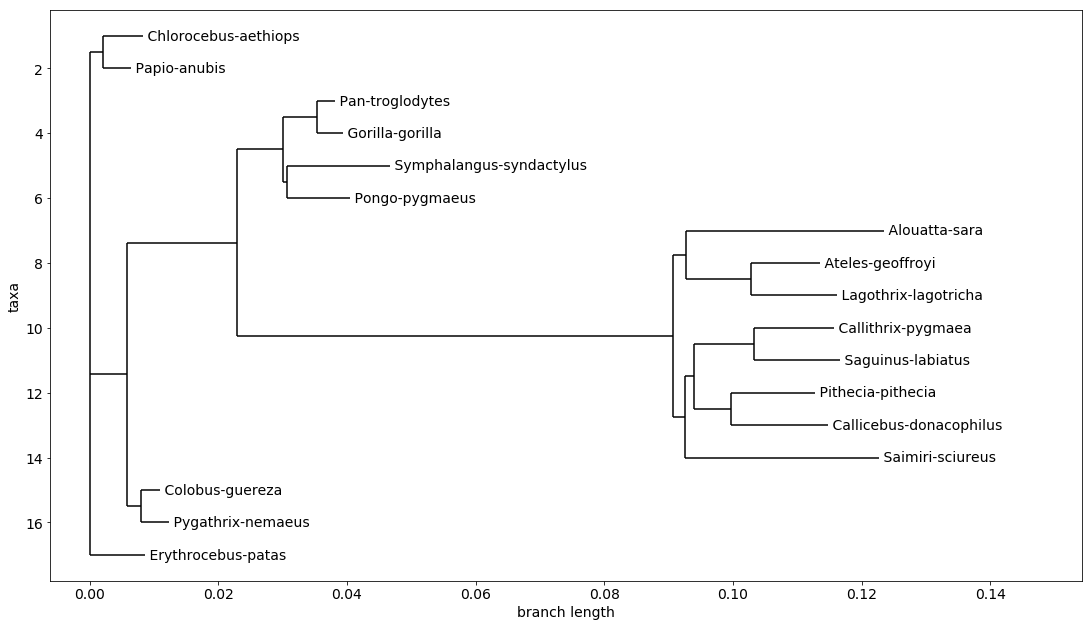

In [10]:
import matplotlib
matplotlib.rc('font', size=14)
# set the size of the figure
Phylo.draw(tree,do_show=False)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('tree.png', dpi=100)

/usr/lib/python3.7/site-packages/Bio/Phylo/_utils.py:135: BiopythonDeprecationWarning: draw_graphviz is deprecated; use Bio.Phylo.draw instead
  BiopythonDeprecationWarning)
/usr/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


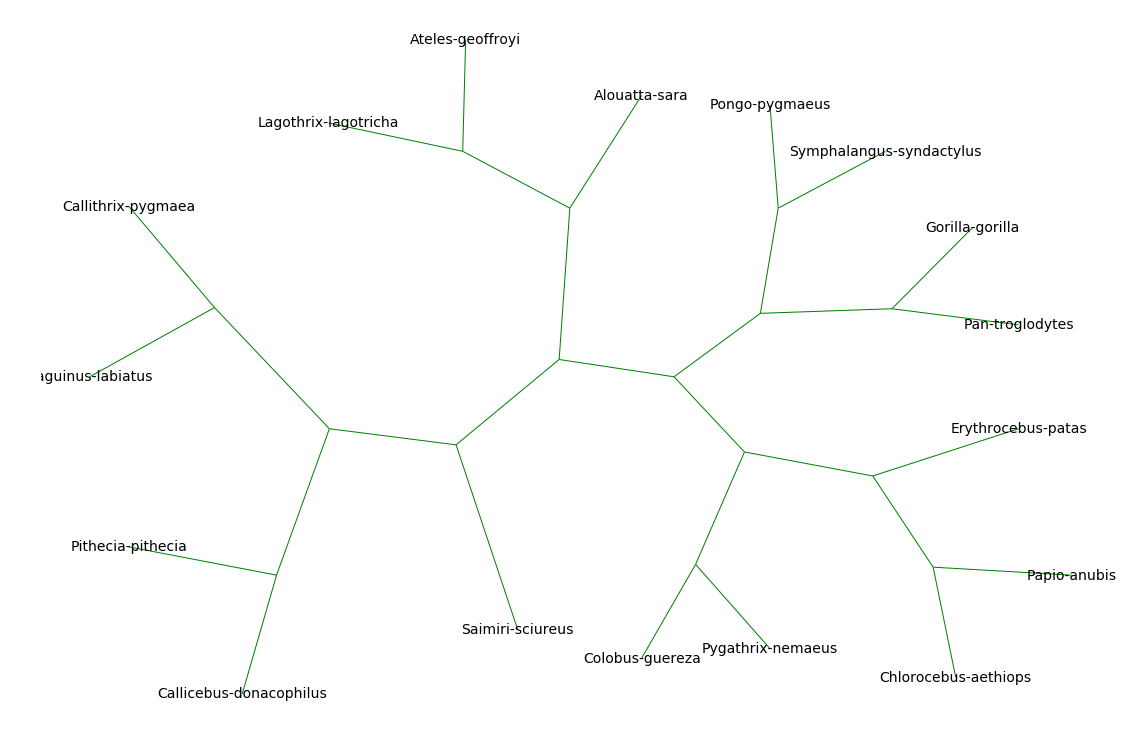

In [11]:
Phylo.draw_graphviz(tree,font_size=14,node_size=0,edge_color='green')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15, 10)
fig.savefig('tree_network.png', dpi=100)
plt.show()

In [12]:
dist_matrix = np.empty(shape=(17,17))
dist_matrix[:] = np.nan

In [13]:
for i in range(17):
    for j in range(17):
        if np.isnan(dist_matrix[i,j]):
            dist_matrix[i,j] = bioinfo.lavenshtein_dist(str(align[i].seq),str(align[j].seq))
            dist_matrix[j,i] = dist_matrix[i,j]

In [14]:
dist_matrix

array([[  0.,  14.,  57.,  37., 151., 100.,  95.,  81.,  83., 384., 386.,
        406., 237., 238., 226., 239., 247.],
       [ 14.,   0.,  57.,  39., 152., 103.,  97.,  83.,  87., 384., 388.,
        410., 241., 242., 228., 241., 251.],
       [ 57.,  57.,   0.,  56., 164., 110., 106.,  92.,  96., 382., 385.,
        407., 240., 236., 225., 238., 249.],
       [ 37.,  39.,  56.,   0., 151., 101.,  95.,  83.,  89., 383., 381.,
        409., 242., 239., 228., 242., 250.],
       [151., 152., 164., 151.,   0.,  71.,  86.,  95.,  97., 426., 430.,
        454., 298., 297., 294., 303., 316.],
       [100., 103., 110., 101.,  71.,   0.,  39.,  41.,  43., 399., 403.,
        429., 256., 258., 248., 259., 271.],
       [ 95.,  97., 106.,  95.,  86.,  39.,   0.,  41.,  44., 400., 403.,
        425., 256., 258., 247., 260., 270.],
       [ 81.,  83.,  92.,  83.,  95.,  41.,  41.,   0.,  15., 381., 384.,
        412., 241., 241., 231., 238., 254.],
       [ 83.,  87.,  96.,  89.,  97.,  43.,  44.

In [15]:
laven = pd.DataFrame(dist_matrix)

In [16]:
laven.to_csv('lavenshtein_distance.csv')